# Practical 2

### [Radzim Sendyka](https://www.cst.cam.ac.uk/people/rs2071), University

of Cambridge

### [Christian Cabrera](https://www.cst.cam.ac.uk/people/chc79), University

of Cambridge

### [Carl Henrik Ek](http://carlhenrik.com), University of Cambridge

### [Neil D. Lawrence](http://inverseprobability.com), University of

Cambridge

### 2024-11-07

**Abstract**: In this lab session we look at working with geospatial
data, in conjunction with the house prices dataset you created in the
previous practicals.

$$
$$

::: {.cell .markdown}

<!-- Do not edit this file locally. -->
<!-- Do not edit this file locally. -->
<!---->
<!-- Do not edit this file locally. -->
<!-- Do not edit this file locally. -->
<!-- The last names to be defined. Should be defined entirely in terms of macros from above-->
<!--

-->

**The check Session for this Practical is 12th November 2024.**
Prerequisite: practical 1, and a working database with tables price paid
data (i.e., `pp_data`) and postcodes(i.e., `postcode_data`)

In this lab session we look at working with geospacial data, in
conjunction with the house prices dataset you created in the previous
practicals. The goal is to enrich the data from the first practical with
geographic data enabling better informed data analysis. Access to the
price paid database is needed to complete some of the below exercises.
You are asked to write reusable code that will help you in the
assessment.

## Accessing Open Street Maps

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_datasets/includes/accessing-osm.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_datasets/includes/accessing-osm.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

[Open Street Maps
(OSM)](https://www.openstreetmap.org/#map=6/54.91/-3.43) is an open
geographic database that can provide useful information about different
locations and places in the planet. In this example, we will download
data about the city of Kampala, Uganda. As always, we should start by
installing some Python packages.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%config InlineBackend.figure_format = 'svg'

In [3]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
sys.path.insert(0, module_path)

In [ ]:
%pip uninstall --yes fynesse
%pip install git+https://github.com/my4ng/my385_ads_2024.git

In [17]:
%pip install --pre osmnx

  Using cached osmnx-2.0.0rc2-py3-none-any.whl.metadata (4.8 kB)
Using cached osmnx-2.0.0rc2-py3-none-any.whl (98 kB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
import osmnx as ox
import matplotlib.pyplot as plt
import warnings
# warnings.filterwarnings("ignore", category=FutureWarning, module='osmnx')

We will download data of Kamplala, Uganda, which has the following
latitude and longitude.

In [6]:
place_name = "Kampala, Uganda"

latitude = 0.347596 # Kampala latitude
longitude = 32.582520 # Kampala longitude

In [7]:
placestub = place_name.lower().replace(' ', '-').replace(',','')

We’ll create a bounding box which is 0.02 degrees wide, 1 degree is
around 111km ([circumference of the Earth is around 40,000
km](https://en.wikipedia.org/wiki/Metre) and 40,000/360=111km). Note:
will this approximation work well in all countries?

In [ ]:
box_width = 0.02 # About 2.2 km
box_height = 0.02
left = longitude - box_width/2
bottom = latitude - box_width/2
top = latitude + box_height/2
right = longitude + box_width/2

Now we’ll download a set of points of interest from OpenStreetMap. We
can specify the points of interest we’re interested in by building a
small dictionary containing their labels as follows. A Point of Interest
is a location with certain importance in the geographic area. They can
vary from amenities to touristic places as you can see in the following.

In [9]:
# Retrieve POIs
tags = {
    "amenity": True,
    "buildings": True,
    "historic": True,
    "leisure": True,
    "shop": True,
    "tourism": True,
    "religion": True,
    "memorial": True
}

We can use `osmnx` to download all such points of interest within a
given bounding box.

In [25]:
bbox = (left, bottom, right, top)
pois = ox.features_from_bbox(bbox, tags)

That operation can take some time, particularly as the bounding box
grows larger. Once it is complete we can check how many points of
interest we have found.

In [26]:
print("There are {number} points of interest surrounding {placename} latitude: {latitude}, longitude: {longitude}".format(number=len(pois), placename=place_name, latitude=latitude, longitude=longitude))

There are 880 points of interest surrounding Kampala, Uganda latitude: 0.347596, longitude: 32.58252


And then we can examine their contents in more detail.

In [27]:
pois

geometry  \
element id                                                              
node    599171967                             POINT (32.5883 0.33888)   
        599171968                            POINT (32.58734 0.33821)   
        599171969                            POINT (32.58817 0.33865)   
        599171971                            POINT (32.58793 0.33845)   
        601370312                            POINT (32.58904 0.34189)   
...                                                               ...   
way     1156972448  POLYGON ((32.59044 0.34826, 32.59079 0.34818, ...   
        1156972449  POLYGON ((32.59025 0.34807, 32.59037 0.34829, ...   
        1156972454  POLYGON ((32.5912 0.34825, 32.59121 0.34818, 3...   
        1156972457  POLYGON ((32.59168 0.34846, 32.59168 0.34837, ...   
        1156972468  POLYGON ((32.59155 0.34854, 32.59155 0.34839, ...   

                   addr:housenumber  addr:street      amenity  cuisine  \
element id                                                               
node    599171967           Plot 21  Cooper Road   restaurant  mexican   
        599171968               NaN          NaN          NaN      NaN   
        599171969               NaN          NaN          NaN      NaN   
        599171971               NaN          NaN     pharmacy      NaN   
        601370312               NaN          NaN         fuel      NaN   
...                             ...          ...          ...      ...   
way     1156972448              NaN          NaN  marketplace      NaN   
        1156972449              NaN          NaN  marketplace      NaN   
        1156972454              NaN          NaN  marketplace      NaN   
        1156972457              NaN          NaN  marketplace      NaN   
        1156972468              NaN          NaN  marketplace      NaN   

                                       name            phone  \
element id                                                     
node    599171967                  Que Pasa  +256 783 874469   
        599171968    Millennium Supermarket              NaN   
        599171969                  Checkers              NaN   
        599171971   Makro Pharmacy (U) Ltd.              NaN   
        601370312                     Kobil              NaN   
...                                     ...              ...   
way     1156972448                      NaN              NaN   
        1156972449                      NaN              NaN   
        1156972454                      NaN              NaN   
        1156972457                      NaN              NaN   
        1156972468                      NaN              NaN   

                                                              website  \
element id                                                              
node    599171967             https://www.facebook.com/quepasakampala   
        599171968   http://www.millenniumsupermarket.com/profile.html   
        599171969                                                 NaN   
        599171971                                                 NaN   
        601370312                                                 NaN   
...                                                               ...   
way     1156972448                                                NaN   
        1156972449                                                NaN   
        1156972454                                                NaN   
        1156972457                                                NaN   
        1156972468                                                NaN   

                           shop  brand  ... roof:shape community_centre  \
element id                              ...                               
node    599171967           NaN    NaN  ...        NaN              NaN   
        599171968   supermarket    NaN  ...        NaN              NaN   
        599171969   supermarket    NaN  ...        NaN           

### We notice a few things:

1.  Points of interest do not have a consistent OpenStreetMap
    `element_type`, some are `node`, others are `relation` and we also
    have `way`. You can find out more about elements in OpenStreetMap on
    [this wiki page](https://wiki.openstreetmap.org/wiki/Elements). This
    will become important when tidying up the data for next stage
    processing.

2.  Many of the values are missing. In SQL we would express a missing
    value as `NULL`. But in `pandas` a missing value is expressed as
    not-a-number, `NaN`. This is quite a common standard, but it is not
    the only standard. Sometimes data is collected and coded with an
    “unreasonable” value for a missing value. For example, someone might
    set missing values for heights to -999. The concept is that this is
    an obviously void “height” and would trigger a human user to check
    whether it’s a missing value. Of course, this is obvious to humans,
    but not necessarily to a computer!

Nodes, ways and relations in OpenStreetMap all have different *keys*
associated with them. The data is not structured in standard database
columns. Different points of interest might have different keys present
or absent. We might be interested in the following keys.

In [28]:
keys = ["name",
        "addr:city",
        "addr:postcode",
        "amenity",
        "building",
        "building:name",
        "building:colour",
        "building:material",
        "historic",
        "memorial",
        "religion",
        "tourism",
        "emergency",
        "leisure",
        "shop"]

But our downloaded `gdf` may have fewer keys.

In [29]:
pois.columns.values

array(['geometry', 'addr:housenumber', 'addr:street', 'amenity',
       'cuisine', 'name', 'phone', 'website', 'shop', 'brand',
       'brand:wikidata', 'brand:wikipedia', 'compressed_air',
       'opening_hours', 'wheelchair', 'access', 'capacity', 'parking',
       'healthcare', 'addr:city', 'addr:country', 'branch', 'note',
       'designation', 'fee', 'diet:halal', 'diet:kosher',
       'payment:credit_cards', 'payment:debit_cards', 'diet:vegan',
       'diet:vegetarian', 'internet_access', 'outdoor_seating',
       'operator', 'alt_name', 'drive_through', 'level', 'takeaway',
       'email', 'tourism', 'contact:email', 'contact:facebook',
       'contact:instagram', 'contact:phone', 'check_date:opening_hours',
       'internet_access:fee', 'operator:wikidata', 'atm', 'facebook',
       'network', 'short_name', 'check_date', 'fixme', 'addr:suburb',
       'office', 'leisure', 'sport', 'lit', 'supervised', 'surface',
       'covered', 'addr:flats', 'beauty', 'payment:cards', 'paymen

We can write a short piece of code to discover which keys are missing
drom the data frame’s columns.

In [30]:
for key in keys:
    if key not in pois.columns:
        print(key)

present_keys = [key for key in keys if key in pois.columns]
pois[present_keys]

building:name
building:colour
historic
memorial


name addr:city addr:postcode  \
element id                                                            
node    599171967                  Que Pasa       NaN           NaN   
        599171968    Millennium Supermarket       NaN           NaN   
        599171969                  Checkers       NaN           NaN   
        599171971   Makro Pharmacy (U) Ltd.       NaN           NaN   
        601370312                     Kobil       NaN           NaN   
...                                     ...       ...           ...   
way     1156972448                      NaN       NaN           NaN   
        1156972449                      NaN       NaN           NaN   
        1156972454                      NaN       NaN           NaN   
        1156972457                      NaN       NaN           NaN   
        1156972468                      NaN       NaN           NaN   

                        amenity building building:material religion tourism  \
element id                                                                    
node    599171967    restaurant      NaN               NaN      NaN     NaN   
        599171968           NaN      NaN               NaN      NaN     NaN   
        599171969           NaN      NaN               NaN      NaN     NaN   
        599171971      pharmacy      NaN               NaN      NaN     NaN   
        601370312          fuel      NaN               NaN      NaN     NaN   
...                         ...      ...               ...      ...     ...   
way     1156972448  marketplace      NaN               NaN      NaN     NaN   
        1156972449  marketplace      NaN               NaN      NaN     NaN   
        1156972454  marketplace      NaN               NaN      NaN     NaN   
        1156972457  marketplace      NaN               NaN      NaN     NaN   
        1156972468  marketplace      NaN               NaN      NaN     NaN   

                   emergency leisure         shop  
element id                                         
node    599171967        NaN     NaN          NaN  
        599171968        NaN     NaN  supermarket  
        599171969        NaN     NaN  supermarket  
        599171971        NaN     NaN          NaN  
        601370312        NaN     NaN          NaN  
...                      ...     ...          ...  
way     1156972448       NaN     NaN          NaN  
        1156972449       NaN     NaN          NaN  
        1156972454       NaN     NaN          NaN  
        1156972457       NaN     NaN          NaN  
        1156972468       NaN     NaN          NaN  

[880 rows x 11 columns]

This gives us the relevant points of interest (part of the map). If we’d
like to see the entire street network, we can download the entire graph
from the location.

In [31]:
graph = ox.graph_from_bbox(bbox)

# Retrieve nodes and edges
nodes, edges = ox.graph_to_gdfs(graph)

# Get place boundary related to the place name as a geodataframe
area = ox.geocode_to_gdf(place_name)

Which we can then render as follows.

In [62]:
import matplotlib.pyplot as plt

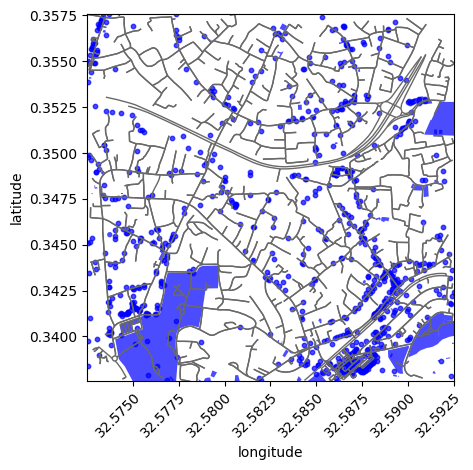

In [63]:
fig, ax = plt.subplots()

# Plot the footprint
area.plot(ax=ax, facecolor="white")

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor="dimgray")

ax.set_xlim([left, right])
ax.set_ylim([bottom, top])
ax.set_xlabel("longitude")
ax.set_ylabel("latitude")

# Plot all POIs
pois.plot(ax=ax, color="blue", alpha=0.7, markersize=10)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.tight_layout()

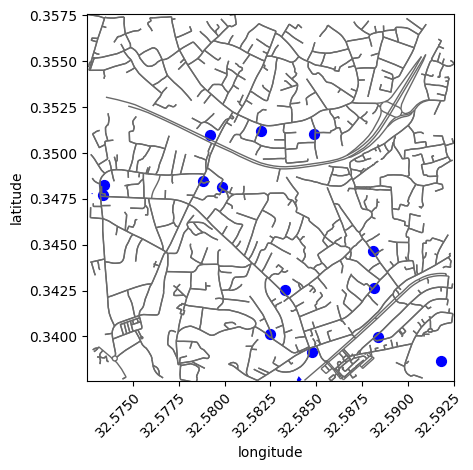

In [64]:
# Plot a subset of the POIs (e.g., tourist places)
# Create figure
fig, ax = plt.subplots()

# Plot the footprint
area.plot(ax=ax, facecolor="white")

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor="dimgray")

ax.set_xlim([left, right])
ax.set_ylim([bottom, top])
ax.set_xlabel("longitude")
ax.set_ylabel("latitude")

# Plot tourist places
tourist_places = pois[pois.tourism.notnull()]
tourist_places.plot(ax=ax, color="blue", alpha=1, markersize=50)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.tight_layout()

We have the POI information on all tourist places structured in a
geodataframe. To work with them in a machine learning algorithm, it will
be easier to convert them to a pandas DataFrame.

In [67]:
import pandas as pd

In [68]:
pois_df = pd.DataFrame(pois)
pois_df['latitude'] = pois_df.apply(lambda row: row.geometry.centroid.y, axis=1)
pois_df['longitude'] = pois_df.apply(lambda row: row.geometry.centroid.x, axis=1)

tourist_places_df = pois_df[pois_df.tourism.notnull()]
print(len(tourist_places_df))
tourist_places_df

16


geometry  \
element id                                                              
node    3032234586                           POINT (32.58834 0.33994)   
        4119308804                           POINT (32.58817 0.34264)   
        4942954054                            POINT (32.5918 0.33868)   
        5678162422                           POINT (32.58474 0.33914)   
        7743212629                           POINT (32.58812 0.34466)   
        8445011017                           POINT (32.57987 0.34816)   
        8456545033                           POINT (32.58329 0.34251)   
        8456545129                           POINT (32.57336 0.34773)   
        8481722617                            POINT (32.5734 0.34824)   
        8498971118                            POINT (32.57883 0.3485)   
        8597526517                           POINT (32.57918 0.35097)   
        8686698118                           POINT (32.58197 0.35119)   
        8686698119                           POINT (32.58485 0.35106)   
        8778105111                           POINT (32.58247 0.34012)   
way     437577068   POLYGON ((32.58394 0.33763, 32.58404 0.33783, ...   
        649469461   POLYGON ((32.57274 0.34776, 32.57274 0.3478, 3...   

                   addr:housenumber           addr:street             amenity  \
element id                                                                      
node    3032234586              NaN                   NaN                 NaN   
        4119308804              NaN                   NaN  mobile_money_agent   
        4942954054              NaN                   NaN                 NaN   
        5678162422              NaN                   NaN                 NaN   
        7743212629              NaN                   NaN                 NaN   
        8445011017              NaN      Kisingiri Street                 NaN   
        8456545033              NaN          Mawanda Road                 NaN   
        8456545129              NaN          Mawanda Road                 NaN   
        8481722617              NaN                   NaN                 NaN   
        8498971118              NaN                   NaN                 NaN   
        8597526517              NaN                   NaN                 NaN   
        8686698118              NaN          Oketcho Road                 NaN   
        8686698119              NaN           Kasubi Road                 NaN   
        8778105111          8HQJ+XW  New Mulago Gate Road                 NaN   
way     437577068           Plot 72            Kiira Road                 NaN   
        649469461               NaN                   NaN                 NaN   

                   cuisine                       name            phone  \
element id                                                               
node    3032234586     NaN                    Fat Cat  +256 771 393892   
        4119308804     NaN                Green apple              NaN   
        4942954054     NaN                Okrut Close              NaN   
        5678162422     NaN          Tagore Apartments              NaN   
        7743212629     NaN                        NaN              NaN   
        8445011017     NaN               Prisma Hotel       0414371122   
        8456545033     NaN          Silverline Condos              NaN   
        8456545129     NaN            Kida Guesthouse              NaN   
        8481722617     NaN           Koda Guest House              NaN   
        8498971118     NaN         Mulago Guest House              NaN   
        8597526517     NaN           Papa Guest house              NaN   
        8686698118     NaN          Silent Corner inn              NaN   
        8686698119     NaN           Kerona Dam Hotel              NaN   
        8778105111     NaN                 Nyumba 591    +256792172017   
way     437577068      NaN  Hilton Garden Inn Kampala  +256 31 3800800   
        649469461      NaN   

In [ ]:
poi_counts = {}

poi_types =["amenity", "histsoric", "leisure", "shop", "tourism", "religion", "memorial"]

for tag in poi_types:
  if tag in pois_df.columns:
    poi_counts[tag] = pois_df[tag].notnull().sum()
  else:
    poi_counts[tag] = 0

poi_counts_df = pd.DataFrame(list(poi_counts.items()), columns=['POI Type', 'Count'])

poi_counts_df

{'amenity': 729, 'histsoric': 0, 'leisure': 20, 'shop': 163, 'tourism': 16, 'religion': 7, 'memorial': 0}


POI Type  Count
0    amenity    729
1  histsoric      0
2    leisure     20
3       shop    163
4    tourism     16
5   religion      7
6   memorial      0

## Assessing the Available OpenStreetMap Features

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_datasets/includes/assessing-osm.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_datasets/includes/assessing-osm.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

In the course assessment you will be given the task of constructing a
prediction system for various indicators at a given location. We expect
that knowledge of the local region around the property should be helpful
in making those predictions. To evaluate this we will now look at
[OpenStreetMap](https://www.openstreetmap.org) as a data source.

In this section, you should follow the methodology used in the above
example to extract summary OSM information that can be useful in making
predictions about an area. Use code from the example to construct a
function that summarises the number of various points of interest in a
target area. You should write reusable code that allows you to explore
the characteristics of different points of interest.

In [ ]:
def count_pois_near_coordinates(latitude: float, longitude: float, tags: dict, distance_km: float = 1.0) -> dict:
    """
    Count Points of Interest (POIs) near a given pair of coordinates within a specified distance.
    Args:
        latitude (float): Latitude of the location.
        longitude (float): Longitude of the location.
        tags (dict): A dictionary of OSM tags to filter the POIs (e.g., {'amenity': True, 'tourism': True}).
        distance_km (float): The distance around the location in kilometers. Default is 1 km.
    Returns:
        dict: A dictionary where keys are the OSM tags and values are the counts of POIs for each tag.
    """

Now that you have written reusable code, choose the tags you want to
query. This should be different from the tags used in the example. You
can also search for specific tags like this:
`"amenity": ["university", ...`.

In [338]:
# Modify this dict
tags = {
    "amenity": ["university"],
    "historic": True,
    "leisure": True,
    "shop": True,
    "tourism": True,
    "religion": True,
}

Here there are 13 UK locations.

In [336]:
locations_dict = {
    "Cambridge": (52.2054, 0.1132),
    "Oxford": (51.7570, -1.2545),
    "Euston Square": (51.5246, -0.1340),
    "Temple": (51.5115, -0.1160),
    "Kensington": (51.4988, -0.1749),
    "Barnsley": (53.5526, -1.4797),
    "Mansfield": (53.1472, -1.1987),
    "Wakefield": (53.6848, -1.5039),
    "Sunderland": (54.9069, -1.3838),
    "Rotherham": (53.4300, -1.3568),
    "Doncaster": (53.5228, -1.1288),
    "Chesterfield": (53.2350, -1.4210),
    "Huddersfield": (53.6450, -1.7794)
    }

### Exercise 1

Use your code to query the OSM feature counts for each of them, and
combine them into one dataframe.

### Exercise 1 Answer

Write your answer to Exercise 1 here

In [335]:
from fynesse import *
import pandas as pd

We can observe that if we are simply counting all the amenity keys, then non-university entries are also included if they are sourced from another part of the query. Therefore, we have to distinguish locations more thoroughly. 

In [340]:
# This is a more powerful representation than tags.

features = {
  "Higher Education": [("amenity", ["university", "research_institute"])],
  "Historic": [("historic", True)],
  "Sport/Park": [("leisure", ["park", "dog_park"]), ("sport", True)],
  "Public Transport": [("public_transport", ["platform"])],
  "Shop": [("shop", True)],
  "High/Med Res.": [("building", ["apartments", "terrace"])],
}

In [341]:
# Use this box for any code you need

location_poi_counts = {}

for location, coords in list(locations_dict.items()):
  location_poi_counts[location] = access.count_pois_near_coordinates(*coords, features, 2)
poi_counts_df = pd.DataFrame.from_dict(location_poi_counts, orient='index')
poi_counts_df

Higher Education  Historic  Sport/Park  Public Transport  Shop  \
Cambridge                    85        50         252               226   673   
Oxford                       78       107         340               218   527   
Euston Square                82       581         274               590  4178   
Temple                       84       734         302               770  3495   
Kensington                    8       420         174               430  2614   
Barnsley                      0         9         115               158   377   
Mansfield                     0        22         106               314   507   
Wakefield                     0         6         118               302   623   
Sunderland                    6        15          82               331   323   
Rotherham                     0         4          61               148   258   
Doncaster                     0         5          76                90   338   
Chesterfield                  0         8          65               277   513   
Huddersfield                  1        27         120               144   419   

               High/Med Res.  
Cambridge               1247  
Oxford                   860  
Euston Square           1343  
Temple                  1293  
Kensington              3037  
Barnsley                  43  
Mansfield                154  
Wakefield                407  
Sunderland               115  
Rotherham                720  
Doncaster                 33  
Chesterfield             233  
Huddersfield              80

### Exercise 2

Use k-means clustering or another clustering method to try to find
clusters of similar areas, based on nearby OSM features.

### Exercise 2 Answer

Write your answer to Exercise 2 here

In [342]:
from sklearn import cluster, decomposition
import matplotlib.pyplot as plt

In [343]:
data = poi_counts_df.to_numpy()

kmeans = cluster.KMeans(n_clusters=4, n_init=10).fit(data)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

df = pd.DataFrame.from_dict(locations_dict, orient='index', columns=['latitude', 'longitude'])
df['cluster'] = labels
df

latitude  longitude  cluster
Cambridge       52.2054     0.1132        0
Oxford          51.7570    -1.2545        0
Euston Square   51.5246    -0.1340        1
Temple          51.5115    -0.1160        1
Kensington      51.4988    -0.1749        2
Barnsley        53.5526    -1.4797        3
Mansfield       53.1472    -1.1987        3
Wakefield       53.6848    -1.5039        3
Sunderland      54.9069    -1.3838        3
Rotherham       53.4300    -1.3568        0
Doncaster       53.5228    -1.1288        3
Chesterfield    53.2350    -1.4210        3
Huddersfield    53.6450    -1.7794        3

We will further use principal component analysis to visualise the data and classification in 3D:

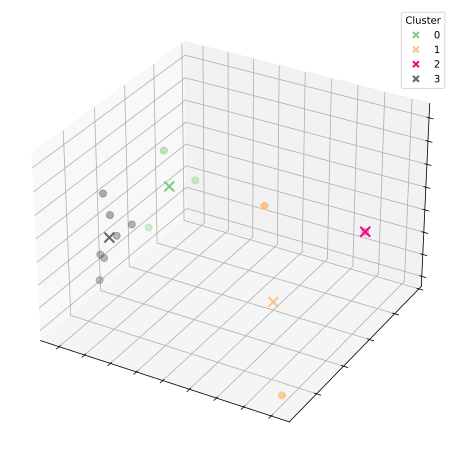

In [347]:
pca = decomposition.PCA(n_components=3)
reduced = pca.fit_transform(data).transpose()
reduced_centroids = pca.transform(centroids).transpose()

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')

ax.scatter(
  reduced[0], 
  reduced[1], 
  reduced[2], 
  s=50, 
  c=labels, 
  cmap='Accent'
)

scatter = ax.scatter(
  reduced_centroids[0], 
  reduced_centroids[1], 
  reduced_centroids[2], 
  s=100, 
  c=range(0, 4),
  linewidths=2,
  marker='x',
  alpha=1, 
  cmap='Accent'
)

ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
ax.axis('auto')
ax.legend(*scatter.legend_elements(), title='Cluster')

### Exercise 3

Investigate the locations yourself, and assign them categories based on
your interpretation. Visualise and compare your manual assignments
against your clustering results.

### Exercise 3 Answer

Write your answer to Exercise 3 here

We will use a variety of sources to investigate the locations, such as their Wikipedia pages, satellite images, and Google street views:

- Cambridge: university area
- Oxford: university area
- Euston Square: metropolitan area
- Temple: metropolitan area
- Kensington: metropolitan area
- Barnsley: town area
- Mansfield: town area
- Wakefield: town area
- Sunderland: town area
- Rotherham: town area
- Doncaster: town area
- Chesterfield: town area
- Huddersfield: town area

They can be roughly separated into three main categories:
- university area: many higher education institutions and greenery, moderate number of higher/medium density housing
- metropolitan area: dense residential and commercial locations in London, with a strong historical and cultural heritage
- town area: local market towns and cities with relatively lower population, and less educational/historic sites

### Exercise 4

Normalise your dataframe and compute a distance matrix for the
locations. Visualise it, and compare the outcode with your previous
clustering results.

### Exercise 4 Answer

Write your answer to Exercise 4 here

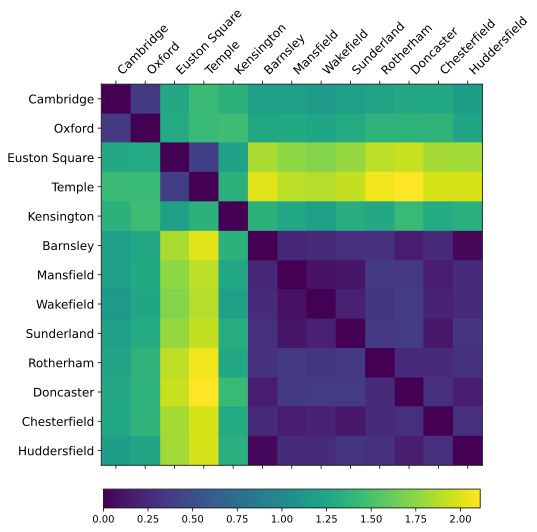

In [348]:
from sklearn import preprocessing, metrics

# normalise data using the min max scaler
normalised_data = preprocessing.MinMaxScaler().fit_transform(data)
normalised_data

# compute the distance matrix
distance_matrix = metrics.pairwise_distances(normalised_data)
distance_matrix

# plot the matrix
fig, ax = plt.subplots(figsize=(8, 8))

im = ax.matshow(distance_matrix)
ax.set_xticks(range(0, 13), poi_counts_df.index, fontsize=12, rotation=45, ha='left')
ax.set_yticks(range(0, 13), poi_counts_df.index, fontsize=12)

fig.colorbar(im, ax=ax, orientation='horizontal', shrink=0.75, pad=0.05)
fig.tight_layout()

We can observe some differences between the un-normalised clustering results and the normalised distance matrix results. In particular, the previous one clusters Cambridge and Oxford with Rotherham. This highlights the issue that larger features, in this example High/Medium density residential buildings completely overshadow smaller ones such as higher education since the distances are larger in absolute terms, even though the differences across the locations in the latter are also very significant. One method to mitigate this is to apply a normalisation technique, such as a min-max scaler to bring all the features to the same range, in this case from 0 to 1. 

After applying normalisation, the results agree with each other:

In [394]:
from sklearn import preprocessing

data = poi_counts_df.to_numpy()
data = preprocessing.MinMaxScaler().fit_transform(data)

kmeans = cluster.KMeans(n_clusters=4, n_init=10).fit(data)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

df = pd.DataFrame.from_dict(locations_dict, orient='index', columns=['latitude', 'longitude'])
df['cluster'] = labels
df

latitude  longitude  cluster
Cambridge       52.2054     0.1132        0
Oxford          51.7570    -1.2545        0
Euston Square   51.5246    -0.1340        2
Temple          51.5115    -0.1160        2
Kensington      51.4988    -0.1749        3
Barnsley        53.5526    -1.4797        1
Mansfield       53.1472    -1.1987        1
Wakefield       53.6848    -1.5039        1
Sunderland      54.9069    -1.3838        1
Rotherham       53.4300    -1.3568        1
Doncaster       53.5228    -1.1288        1
Chesterfield    53.2350    -1.4210        1
Huddersfield    53.6450    -1.7794        1

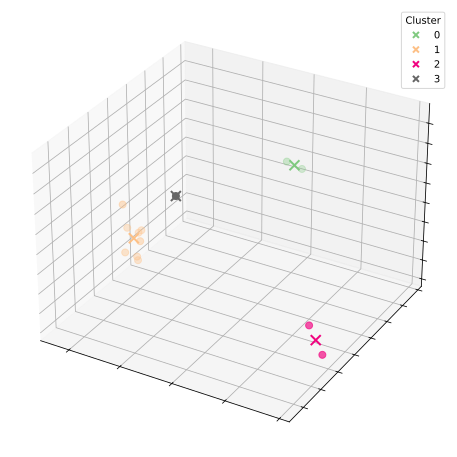

In [395]:
pca = decomposition.PCA(n_components=3)
reduced = pca.fit_transform(data).transpose()
reduced_centroids = pca.transform(centroids).transpose()

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')

ax.scatter(
  reduced[0], 
  reduced[1], 
  reduced[2], 
  s=50, 
  c=labels, 
  cmap='Accent'
)

scatter = ax.scatter(
  reduced_centroids[0], 
  reduced_centroids[1], 
  reduced_centroids[2], 
  s=100, 
  c=range(0, 4),
  linewidths=2,
  marker='x',
  alpha=1, 
  cmap='Accent'
)

ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
ax.axis('auto')
ax.legend(*scatter.legend_elements(), title='Cluster')

### Exercise 5

Which features you included were correlated among each other?
Investigate and plot a feature correlation matrix. What do these results
say about your feature selection?

### Exercise 5 Answer

Write your answer to Exercise 5 here

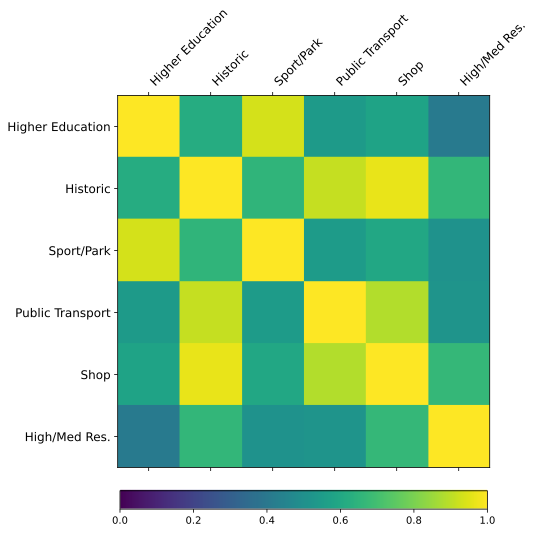

In [396]:
# compute the correlation matrix
correlation_matrix = poi_counts_df.corr()
correlation_matrix

# plot the matrix
fig, ax = plt.subplots(figsize=(8, 8))

im = ax.matshow(correlation_matrix, vmin=0.0, vmax=1.0)
ax.set_xticks(range(0, 6), poi_counts_df.columns, fontsize=12, rotation=45, ha='left')
ax.set_yticks(range(0, 6), poi_counts_df.columns, fontsize=12)

fig.colorbar(im, ax=ax, orientation='horizontal', shrink=0.75, pad=0.05)
fig.tight_layout()

There's moderate correlation across most features, but some have strong correlation such as between historical places and shops. Ideally we want the features to be as un-correlated as possible, to avoid data co-linearity which can make interpretation impossible since the weights can vary wildly. Overall, the features are not too correlated as a whole, indicating a good range of features selected.

## Joining Spatial Data

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_access/includes/spatial-join.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_access/includes/spatial-join.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

### Matching OpenStreetMap and House Prices data

In this exercise you will download the geographies of houses from
OpenStreetMap and map them to visualise the records you see in the house
price dataset. This is a data linking and validation exercise.

The latitude and longitude of Cambridge are as follows:

In [431]:
place_name = "Cambridge"
latitude = 52.1951
longitude = 0.1313

We want to execute an SQL query on your database to select all houses in
a 1km x 1km region around the centre of Cambridge that have been part of
housing transactions since 2020.

This operation can take a very long time. This is because the table is
not indexed on coordinate data, and therefore the query has to check
tens of millions of rows. This can be fixed by constructing an index on
the `latitude` and `longitude` values, using `BTREE` to make a joint
index. *Note that indexing can take a long time.* Consider also indexing
your table by other variables you might find useful later.

### Exercise 6

Index the table on the coordinate data using a `BTREE` and index other
columns you might find useful.

### Exercise 6 Answer

Write your answer to Exercise 6 here

In [6]:
%load_ext sql
%config SqlMagic.displaycon = False

In [145]:
import yaml
import sqlalchemy

# with open("credentials.yaml") as file:
#   credentials = yaml.safe_load(file)
# username = credentials["username"]
# password = credentials["password"]
# url = credentials["url"]
# port = credentials["port"]

# db_url = f"mariadb+pymysql://{username}:{password}@{url}?local_infile=1"
# engine = sqlalchemy.create_engine(db_url)
# %sql engine
# %sql SHOW databases

db_url = f"mariadb+pymysql://root:@localhost/ads_2024?local_infile=1"
engine = sqlalchemy.create_engine(db_url)
%sql engine
%sql SHOW databases

5 rows affected.

+--------------------+
|      Database      |
+--------------------+
|      ads_2024      |
| information_schema |
|       mysql        |
| performance_schema |
|        sys         |
+--------------------+

In [ ]:
%%sql
USE `ads_2024`;
CREATE INDEX idx_date_of_transfer ON prices_coordinates_data(date_of_transfer);
CREATE INDEX idx_coordinate ON prices_coordinates_data(latitude,longitude);

In [146]:
%%sql
USE `ads_2024`;
SHOW INDEX FROM `prices_coordinates_data`

4 rows affected.

+-------------------------+------------+----------------------+--------------+------------------+-----------+-------------+----------+--------+------+------------+---------+---------------+---------+
|          Table          | Non_unique |       Key_name       | Seq_in_index |   Column_name    | Collation | Cardinality | Sub_part | Packed | Null | Index_type | Comment | Index_comment | Ignored |
+-------------------------+------------+----------------------+--------------+------------------+-----------+-------------+----------+--------+------+------------+---------+---------------+---------+
| prices_coordinates_data |     0      |       PRIMARY        |      1       |      db_id       |     A     |   4232714   |   None   |  None  |      |   BTREE    |         |               |    NO   |
| prices_coordinates_data |     1      | idx_date_of_transfer |      1       | date_of_transfer |     A     |     989     |   None   |  None  |      |   BTREE    |         |               |    NO   |
| prices_coordinates_data |     1      |    idx_coordinate    |      1       |     latitude     |     A     |   1058178   |   None   |  None  |      |   BTREE    |         |               |    NO   |
| prices_coordinates_data |     1      |    idx_coordinate    |      2       |    longitude     |     A     |   1058178   |   None   |  None  |      |   BTREE    |         |               |    NO   |
+-------------------------+------------+----------------------+--------------+------------------+-----------+-------------+----------+--------+------+------------+---------+---------------+---------+

### Exercise 7

Write an SQL query on your database to select all houses in a 1km x 1km
region around the centre of Cambridge that have been part of housing
transactions since 2020.

### Exercise 7 Answer

Write your answer to Exercise 7 here

In [432]:
from fynesse import access
import osmnx as ox
import pandas as pd
import matplotlib.pyplot as plt

# conn = access.create_connection(username, password, url, "ads_2024")
conn = access.create_connection("root", "", "localhost", "ads_2024")

Connection established!


In [433]:
bbox = ox.utils_geo.bbox_from_point((latitude, longitude), 500)
left, bottom, right, top = bbox

query = f"""
  SELECT * FROM `prices_coordinates_data` 
  WHERE date_of_transfer >= '2020-01-01'
  AND latitude BETWEEN {bottom} AND {top}
  AND longitude BETWEEN {left} AND {right}
  """

df = pd.read_sql(query, engine)
df

price date_of_transfer postcode property_type new_build_flag  \
0    288000       2021-03-26  CB2 8AX             F              N   
1    320000       2023-03-17  CB2 8AX             F              N   
2    325000       2023-11-10  CB2 8AX             F              N   
3    392000       2023-06-19  CB2 8DB             F              N   
4    500000       2023-07-13  CB2 8DB             F              N   
..      ...              ...      ...           ...            ...   
383  475000       2021-06-29  CB1 2HW             T              N   
384  528000       2022-08-31  CB1 2HW             T              N   
385  595000       2020-10-15  CB1 2EH             F              N   
386  555000       2023-01-05  CB1 2EH             F              N   
387  570000       2024-05-31  CB1 2EH             F              N   

    tenure_type primary_addressable_object_name  \
0             L                              19   
1             L                               4   
2             L                               5   
3             L                              11   
4             L                              32   
..          ...                             ...   
383           F                              10   
384           F                              22   
385           L                               9   
386           L                              26   
387           L                              23   

    secondary_addressable_object_name             street locality  town_city  \
0                                              QUEENSWAY           CAMBRIDGE   
1                                              QUEENSWAY           CAMBRIDGE   
2                                              QUEENSWAY           CAMBRIDGE   
3                                      GLENALMOND AVENUE           CAMBRIDGE   
4                                      GLENALMOND AVENUE           CAMBRIDGE   
..                                ...                ...      ...        ...   
383                                         CROSS STREET           CAMBRIDGE   
384                                         CROSS STREET           CAMBRIDGE   
385                                         FENNERS LAWN           CAMBRIDGE   
386                                         FENNERS LAWN           CAMBRIDGE   
387                                         FENNERS LAWN           CAMBRIDGE   

      district          county  country   latitude  longitude    db_id  
0    CAMBRIDGE  CAMBRIDGESHIRE  England  52.190612   0.124065  1223848  
1    CAMBRIDGE  CAMBRIDGESHIRE  England  52.190612   0.124065  3502820  
2    CAMBRIDGE  CAMBRIDGESHIRE  England  52.190612   0.124065  4015409  
3    CAMBRIDGE  CAMBRIDGESHIRE  England  52.190642   0.133357  3688286  
4    CAMBRIDGE  CAMBRIDGESHIRE  England  52.190642   0.133357  3746002  
..         ...             ...      ...        ...        ...      ...  
383  CAMBRIDGE  CAMBRIDGESHIRE  England  52.199575   0.134604  1602402  
384  CAMBRIDGE  CAMBRIDGESHIRE  England  52.199575   0.134604  2907223  
385  CAMBRIDGE  CAMBRIDGESHIRE  England  52.199596   0.130493   609028  
386  CAMBRIDGE  CAMBRIDGESHIRE  England  52.199596   0.130493  3346267  
387  CAMBRIDGE  CAMBRIDGESHIRE  England  52.199596   0.130493  4368980  

[388 rows x 17 columns]

In [434]:
graph = ox.graph_from_bbox(bbox, truncate_by_edge=True)

# Retrieve nodes and edges
nodes, edges = ox.graph_to_gdfs(graph)

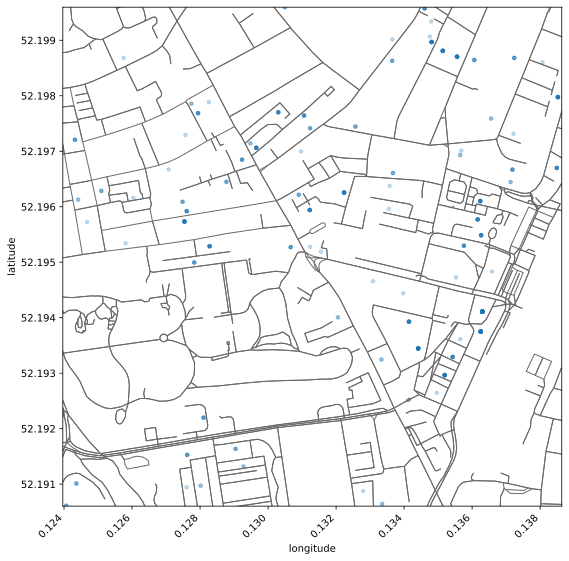

In [435]:
fig, ax = plt.subplots(figsize=(8,8))

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor="dimgray")

ax.scatter(df['longitude'], df['latitude'], marker='.', s=50, alpha=0.25)

ax.set_xlim([left, right])
ax.set_ylim([bottom, top])
ax.set_xlabel("longitude")
ax.set_ylabel("latitude")
ax.ticklabel_format(useOffset=False)

plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()

### Exercise 8

Get information about all the buildings in that area from OpenStreetMaps
(`'building': True`). You will need their address information
(`addr:housenumber`, `addr:street`, `addr:postcode`, …) and geometry
polygon (`geometries_from_bbox`). Construct a dataframe that lists all
OSM buildings in the area that have a full address, along with their
area (in square meters). Plot a map of the area, using color to mark the
buildings with addresses and the ones without.

### Exercise 8 Answer

Write your answer to Exercise 8 here

In [436]:
gdf = ox.features_from_bbox(bbox, { 'building': True })
gdf

geometry  \
element  id                                                              
relation 1860558     POLYGON ((0.13336 52.19175, 0.13332 52.19188, ...   
         1913621     POLYGON ((0.12685 52.19458, 0.12686 52.19458, ...   
         3540620     POLYGON ((0.12883 52.19664, 0.1288 52.19664, 0...   
         7544766     POLYGON ((0.13336 52.19175, 0.13332 52.19188, ...   
way      5639400     POLYGON ((0.1379 52.19493, 0.13809 52.19488, 0...   
...                                                                ...   
         1247648584  POLYGON ((0.13474 52.19602, 0.13475 52.19607, ...   
         1247648585  POLYGON ((0.13472 52.19597, 0.13474 52.19602, ...   
         1247648586  POLYGON ((0.13467 52.19586, 0.13469 52.19592, ...   
         1267709121  POLYGON ((0.13759 52.19282, 0.13752 52.19273, ...   
         1271723407  POLYGON ((0.13069 52.19096, 0.13071 52.1909, 0...   

                     addr:city addr:country addr:postcode       addr:street  \
element  id                                                                   
relation 1860558     Cambridge           GB       CB2 1RE        Hills Road   
         1913621     Cambridge           GB           NaN               NaN   
         3540620     Cambridge          NaN       CB2 1HT    Russell Street   
         7544766     Cambridge           GB           NaN               NaN   
way      5639400     Cambridge           GB       CB1 2JB      Station Road   
...                        ...          ...           ...               ...   
         1247648584        NaN          NaN           NaN               NaN   
         1247648585        NaN          NaN           NaN               NaN   
         1247648586        NaN          NaN           NaN               NaN   
         1267709121        NaN          NaN           NaN               NaN   
         1271723407        NaN          NaN       CB2 8BW  Shaftesbury Road   

                               building building:levels        network  \
element  id                                                              
relation 1860558                    yes             NaN            NaN   
         1913621             greenhouse             NaN            NaN   
         3540620             university             NaN            NaN   
         7544766                 office             NaN            NaN   
way      5639400          train_station               2  National Rail   
...                                 ...             ...            ...   
         1247648584             terrace             NaN            NaN   
         1247648585             terrace             NaN            NaN   
         1247648586  semidetached_house             NaN            NaN   
         1267709121                 yes             NaN            NaN   
         1271723407            detached             NaN            NaN   

                    noaddress roof:levels  ... wheelchair:description  \
element  id                                ...                          
relation 1860558          NaN         NaN  ...                    NaN   
         1913621          NaN         NaN  ...                    NaN   
         3540620          NaN         NaN  ...                    NaN   
         7544766          NaN         NaN  ...                    NaN   
way      5639400          yes           0  ...                    NaN   
...                       ...         ...  ...                    ...   
         1247648584       NaN         NaN  ...                    NaN   
         1247648585       NaN         NaN  ...                    NaN   
         1247648586       NaN         NaN  ...                    NaN   
         1267709121       NaN         NaN  ...                    NaN   
         1271723407       NaN         NaN  ...                    NaN   

                    old_fhrs:id building:levels:underground smoking power  \
element  id                                                                 
rela

In [491]:
has_house_name_no = gdf[['addr:housenumber', 'addr:housename']].notnull().any(axis=1)
has_street = gdf['addr:street'].notnull()
has_name = gdf['name'].notnull()
has_full_addr = (has_house_name_no & has_street) | has_name

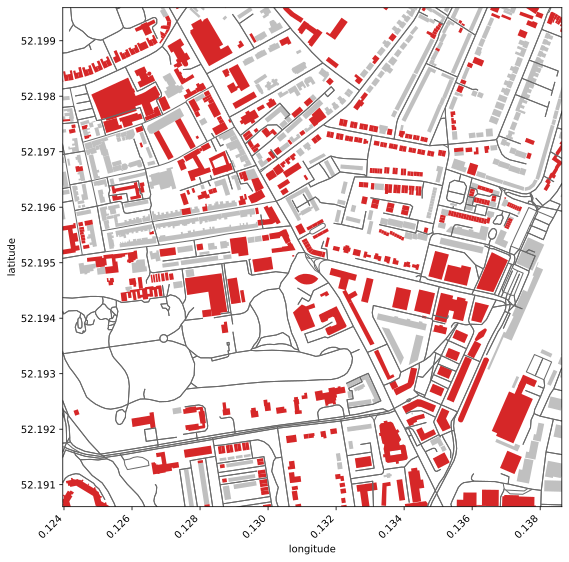

In [438]:
fig, ax = plt.subplots(figsize=(8,8))

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor="dimgray")
gdf[~has_full_addr].plot(ax=ax, color="silver")
gdf[has_full_addr].plot(ax=ax, color="C3")

ax.set_xlim([left, right])
ax.set_ylim([bottom, top])
ax.set_xlabel("longitude")
ax.set_ylabel("latitude")
ax.ticklabel_format(useOffset=False)

plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()

In [489]:
gdf1 = gdf[['geometry']].copy()
gdf1['joined'] = (gdf['addr:housenumber'].fillna(gdf['addr:housename']) + ' ' 
                           + gdf['addr:street']).fillna(gdf['name']).str.upper()
gdf1['area'] = gdf1['geometry'].to_crs(epsg=27700).area
gdf1

geometry  \
element  id                                                              
relation 1860558     POLYGON ((0.13336 52.19175, 0.13332 52.19188, ...   
         1913621     POLYGON ((0.12685 52.19458, 0.12686 52.19458, ...   
         3540620     POLYGON ((0.12883 52.19664, 0.1288 52.19664, 0...   
         7544766     POLYGON ((0.13336 52.19175, 0.13332 52.19188, ...   
way      5639400     POLYGON ((0.1379 52.19493, 0.13809 52.19488, 0...   
...                                                                ...   
         1247648584  POLYGON ((0.13474 52.19602, 0.13475 52.19607, ...   
         1247648585  POLYGON ((0.13472 52.19597, 0.13474 52.19602, ...   
         1247648586  POLYGON ((0.13467 52.19586, 0.13469 52.19592, ...   
         1267709121  POLYGON ((0.13759 52.19282, 0.13752 52.19273, ...   
         1271723407  POLYGON ((0.13069 52.19096, 0.13071 52.1909, 0...   

                                                joined         area  
element  id                                                          
relation 1860558                    126-130 HILLS ROAD  2888.788572  
         1913621                  THE GLASSHOUSE RANGE  1336.955942  
         3540620                      4 RUSSELL STREET   996.763858  
         7544766                                   NaN  2888.788572  
way      5639400                                   NaN  2944.262675  
...                                                ...          ...  
         1247648584                                NaN    44.182740  
         1247648585                                NaN    44.182787  
         1247648586                                NaN    52.581880  
         1267709121  ROYAL MAIL CUSTOMER SERVICE POINT   145.069085  
         1271723407    HORNBEAM HOUSE SHAFTESBURY ROAD    89.228394  

[800 rows x 3 columns]

### Exercise 9

Match the houses you found in the price paid dataset with the buildings
on OpenStreetMaps based on their addresses. Can this be applied to all
building types? Are there any PP transactions which you couldn’t match
to an OSM building, or any OSM buildings you coulnd’t match to a PP
transaction? If so, what could be the reason for this? Do you employ any
techniques to find non-exact matches? If yes, what matches would you
have missed without it? Are you encountering false positive matches? Use
this address matching to merge the two dataframes.

### Exercise 9 Answer

Write your answer to Exercise 9 here

In [452]:
df1 = df[['price', 'date_of_transfer']].copy()
df1['joined'] = df['primary_addressable_object_name'] + ' ' + df['street']
df1

price date_of_transfer                joined
0    288000       2021-03-26          19 QUEENSWAY
1    320000       2023-03-17           4 QUEENSWAY
2    325000       2023-11-10           5 QUEENSWAY
3    392000       2023-06-19  11 GLENALMOND AVENUE
4    500000       2023-07-13  32 GLENALMOND AVENUE
..      ...              ...                   ...
383  475000       2021-06-29       10 CROSS STREET
384  528000       2022-08-31       22 CROSS STREET
385  595000       2020-10-15        9 FENNERS LAWN
386  555000       2023-01-05       26 FENNERS LAWN
387  570000       2024-05-31       23 FENNERS LAWN

[388 rows x 3 columns]

In [449]:
gdf2 = gdf1.merge(df1, on='joined')
gdf2

geometry  \
0    POLYGON ((0.13645 52.19582, 0.13644 52.1958, 0...   
1    POLYGON ((0.13427 52.19656, 0.13418 52.19656, ...   
2    POLYGON ((0.13397 52.19658, 0.1339 52.19658, 0...   
3    POLYGON ((0.1328 52.19714, 0.13282 52.19723, 0...   
4    POLYGON ((0.13252 52.19718, 0.13264 52.19717, ...   
..                                                 ...   
106  POLYGON ((0.13614 52.19359, 0.1361 52.19359, 0...   
107  POLYGON ((0.13614 52.19359, 0.1361 52.19359, 0...   
108  POLYGON ((0.13614 52.19359, 0.1361 52.19359, 0...   
109  POLYGON ((0.13614 52.19359, 0.1361 52.19359, 0...   
110  POLYGON ((0.13614 52.19359, 0.1361 52.19359, 0...   

                     joined        area    price date_of_transfer  
0    31 RAVENSWORTH GARDENS   73.059600   350000       2022-06-13  
1          8 TENISON AVENUE   53.801251  1400000       2022-05-25  
2         14 TENISON AVENUE   66.412436  1758000       2021-06-29  
3        16A LYNDEWODE ROAD   75.229802  2550000       2021-06-29  
4         14 LYNDEWODE ROAD   78.680793  1900000       2024-08-27  
..                      ...         ...      ...              ...  
106        3 STATION SQUARE  281.400178   384200       2022-02-28  
107        3 STATION SQUARE  281.400178   390000       2022-03-14  
108        3 STATION SQUARE  281.400178   630000       2022-04-29  
109        3 STATION SQUARE  281.400178   529000       2022-05-30  
110        3 STATION SQUARE  281.400178   415000       2022-10-07  

[111 rows x 5 columns]

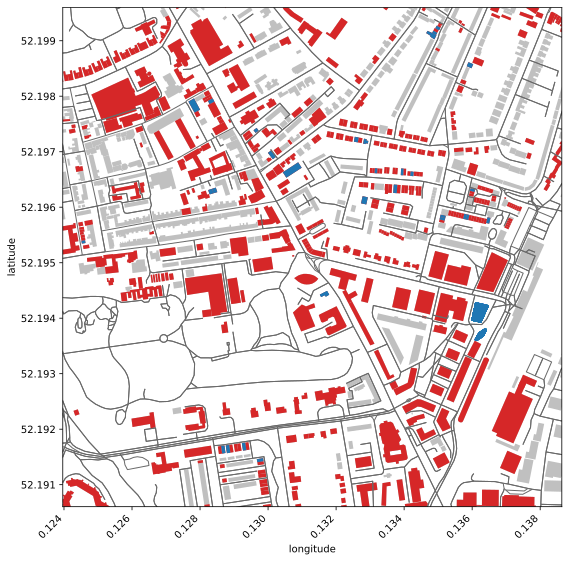

In [460]:
fig, ax = plt.subplots(figsize=(8,8))

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor="dimgray")
gdf.plot(ax=ax, color="silver")
gdf[has_full_addr].plot(ax=ax, color="C3")
gdf2.plot(ax=ax, color="C0")

ax.set_xlim([left, right])
ax.set_ylim([bottom, top])
ax.set_xlabel("longitude")
ax.set_ylabel("latitude")
ax.ticklabel_format(useOffset=False)

plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()

No we cannot. For some building types, such as terrace, the building is not associated with its addresses, e.g. 3-27. If we match all those that is within the range, the area would be erroneously larger since it would be the footprint of the entire terrace. For those it is not possible to associate with an OSM building since the actual address is with a separate, unrelated node. Most of the buildings are not matched to PP transactions since they were not part of a transaction.

For some buildings, there is a name field instead of the typical address fields. Therefore, I use that as a fallback in case to match against the joined capitalised primary addressable name and street name. There doesn't appear to be any false positive within this dataset since it requires both the house name/number AND street name to match; however, it is possible in a larger dataset, where there might be two identically named streets or if the address has been tagged incorrectly.

### Exercise 10

Examine the relationship between the price and area of a property. -
What other variables do you need to account for? - Is the correlation as
strong as you would expect? - What factors could be impacting this?

Visualise the relationships you found.

### Exercise 10 Answer

Write your answer to Exercise 10 here

In [309]:
import scipy.stats as stats

r, p = stats.pearsonr(gdf2['area'], gdf2['price'])

In [314]:
import numpy.polynomial.polynomial as polynomial

b, k = polynomial.polyfit(gdf2['area'], gdf2['price'], 1)

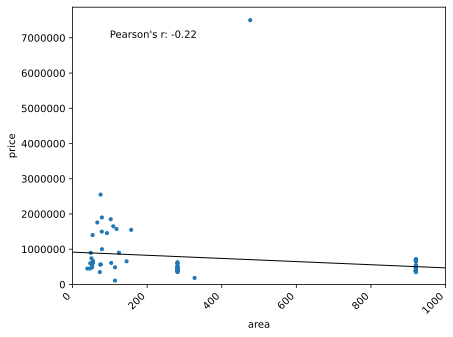

In [332]:
import numpy as np

fig, ax = plt.subplots()

a = np.linspace(0, 1000, 100)

ax.scatter(gdf2['area'], gdf2['price'], s=10)
ax.plot(a, b + k * a, lw=1, color='k')
ax.ticklabel_format(useOffset=False, style='plain')
ax.set_xlim(0, 1000)
ax.set_ylim(0)
ax.set_xlabel("area")
ax.set_ylabel("price")

ax.text(100, 7_000_000, f"Pearson's r: {r:.2f}")

plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()

There is very weak correlation between the two, probably due to the fact that it discounts land area around the building as well as the total size of the building for apartments. If we use the building area as a feature for the price, it would perform poorly as it cannot determine the land area nor the individual apartment's size.

Demonstrate the reusability of your code by executing the same analysis
for Oxford.

In [518]:
place_name = "Oxford"

latitude = 51.7520
longitude = -1.2577

### Exercise 11

Replicating the same analysis for Oxford. You do not need to answer all
the questions again, but you should show that your code works for this
new input without the need to modify it. You should use the Fynesse
library for this. Finish by plotting a map of the area and the
correlation you find.

### Exercise 11 Answer

Write your answer to Exercise 11 here

Pearson's r: -0.181


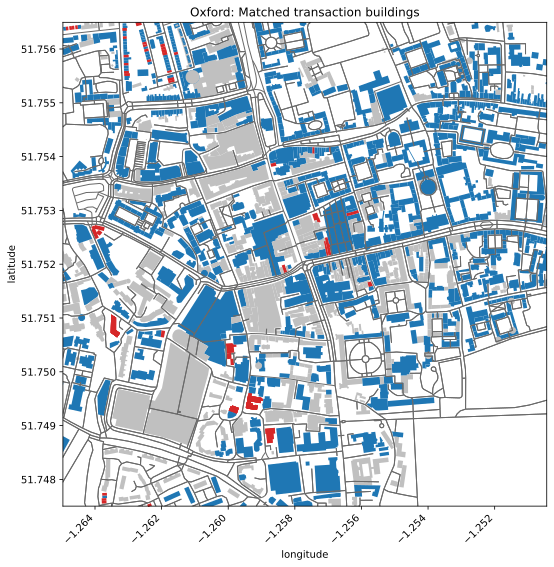

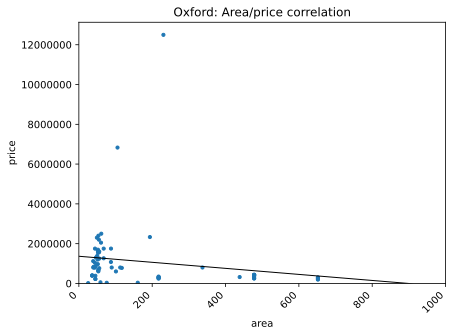

In [ ]:
from fynesse import access, assess

pp_transactions_oxford_df = access.pp_transactions_df(latitude, longitude, 1, engine, '2020-01-01')
full_addr_oxford_gdf = access.full_addr_buildings_gdf(latitude, longitude, 1)
joined_df = assess.join_addr_pp_transaction(full_addr_oxford_gdf, pp_transactions_oxford_df)

assess.plot_joined_addr_pp_transaction(place_name, latitude, longitude, 1, joined_df)
assess.visualise_area_price_corr(place_name, joined_df)

## Conclusions

You should find some of the code you wrote above useful in your final
assessment. Make sure you wrote the code to be reusable and efficient,
and do include it in your Fynesse library. The functions you are
particularly likely to reuse are the OSM feature search, and map
visualisation functions.

### Exercise 12

Add relevant code to your Fynesse library. Demonstrate this was
successful by installing your library below and calling at least two
example functions.

### Exercise 12 Answer

Write your answer to Exercise 12 here

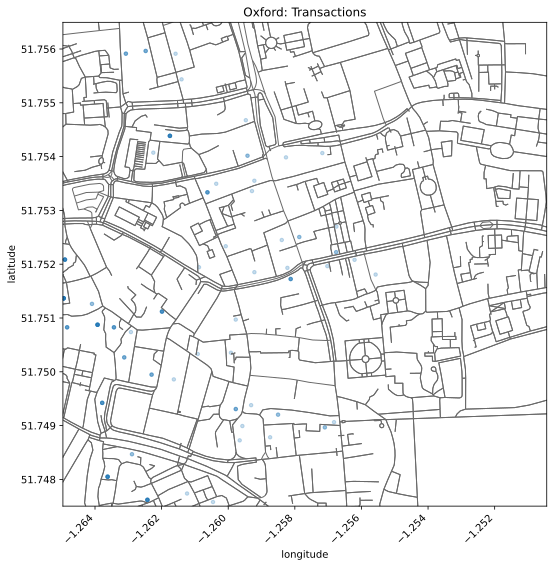

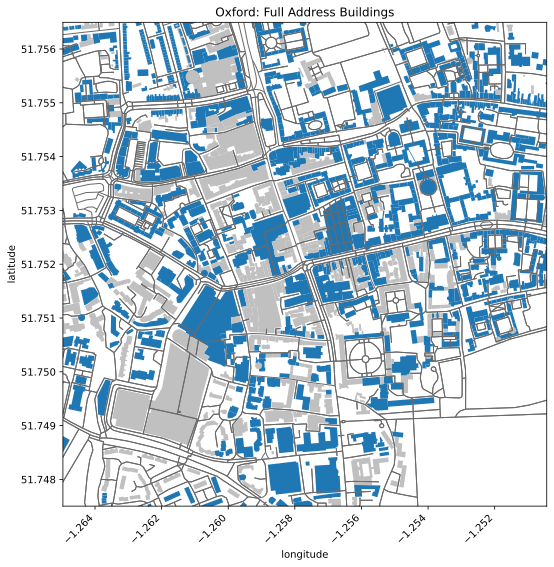

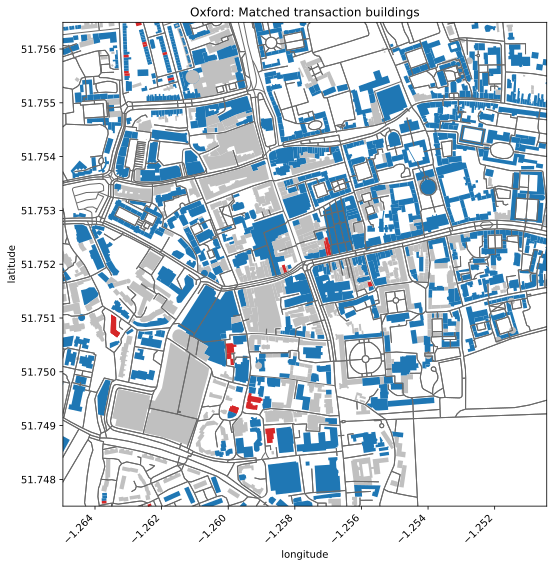

In [516]:
from fynesse import access, assess

pp_transactions_oxford_df = access.pp_transactions_df(latitude, longitude, 1, engine, '2020-01-01')
assess.plot_pp_transactions(place_name, latitude, longitude, 1, pp_transactions_oxford_df)

full_addr_oxford_gdf = access.full_addr_buildings_gdf(latitude, longitude, 1)
assess.plot_full_addr_buildings(place_name, latitude, longitude, 1, full_addr_oxford_gdf)

joined_df = assess.join_addr_pp_transaction(full_addr_oxford_gdf, pp_transactions_oxford_df)
assess.plot_joined_addr_pp_transaction(place_name, latitude, longitude, 1, joined_df)

In [517]:
joined_df[joined_df['price'].notnull()]

date_of_transfer       price                         joined        area  \
270        2021-09-10   1695000.0              53 ST JOHN STREET   52.214041   
288        2023-09-20    300000.0  STAINCROSS HOUSE ALBION PLACE  651.975871   
349        2023-02-17    800000.0             2 ROGER BACON LANE  337.139699   
831        2020-02-14  12498500.0                  9 HIGH STREET  230.597466   
832        2022-01-24    780000.0                  8 HIGH STREET  117.151377   
848        2020-08-10   6830690.0                44 QUEEN STREET  105.404949   
933        2021-04-27   1075524.0                5 ALFRED STREET   87.458209   
986        2021-01-15   1300000.0          12 BEAUMONT BUILDINGS   46.527511   
987        2021-03-01    799000.0          11 BEAUMONT BUILDINGS   44.066898   
995        2023-02-13   1751000.0          20 BEAUMONT BUILDINGS   87.637697   
998        2023-08-04   1750000.0              62 ST JOHN STREET   67.728883   
1027       2024-05-31   1650000.0              169 WALTON STREET   51.734536   
1028       2023-02-13   1600000.0              170 WALTON STREET   55.588413   
1042       2023-05-15   1250000.0              163 WALTON STREET   55.632450   
1048       2023-02-17    800000.0             2 ROGER BACON LANE  112.772664   
1049       2023-02-17    800000.0             2 ROGER BACON LANE   89.556544   
1126       2020-10-29    315000.0           12 LITTLEGATE STREET  217.452836   
1127       2021-06-16    290000.0           12 LITTLEGATE STREET  217.452836   
1128       2021-10-29    302000.0           12 LITTLEGATE STREET  217.452836   
1147       2020-12-11    390000.0      ALBERT HOUSE ALBION PLACE  477.868220   
1244       2020-11-02    345000.0     SWAN COURT PARADISE STREET  477.963764   
1245       2022-07-13    428000.0     SWAN COURT PARADISE STREET  477.963764   
1246       2023-02-10    435000.0     SWAN COURT PARADISE STREET  477.963764   
1247       2024-03-27    430000.0     SWAN COURT PARADISE STREET  477.963764   
1259       2020-09-30     14750.0                22 BROAD STREET   25.384770   
1290       2020-10-09    650000.0              52 TRINITY STREET   53.107429   
1292       2021-03-31    388000.0              13 TRINITY STREET   36.407285   

                                               geometry  
270   POLYGON ((-1.26196 51.75588, -1.26198 51.75593...  
288   POLYGON ((-1.25942 51.74946, -1.25944 51.74946...  
349   POLYGON ((-1.25984 51.75052, -1.25984 51.7505,...  
831   POLYGON ((-1.25703 51.75229, -1.25706 51.75237...  
832   POLYGON ((-1.25709 51.75229, -1.25704 51.75215...  
848   POLYGON ((-1.25831 51.75183, -1.25828 51.75185...  
933   POLYGON ((-1.25572 51.75168, -1.25566 51.7516,...  
986   POLYGON ((-1.26257 51.75608, -1.26259 51.75612...  
987   POLYGON ((-1.26255 51.75603, -1.26257 51.75608...  
995   POLYGON ((-1.26278 51.75649, -1.26262 51.75652...  
998   POLYGON ((-1.26164 51.75548, -1.26162 51.75543...  
1027  POLYGON ((-1.26299 51.75555, -1.26299 51.7556,...  
1028  POLYGON ((-1.26296 51.7555, -1.26296 51.75555,...  
1042  POLYGON ((-1.26314 51.75584, -1.26314 51.75589...  
1048  POLYGON ((-1.25991 51.75035, -1.25991 51.75033...  
1049  POLYGON ((-1.25983 51.75013, -1.25992 51.75012...  
1126  POLYGON ((-1.25998 51.74927, -1.25993 51.74936...  
1127  POLYGON ((-1.25998 51.74927, -1.25993 51.74936...  
1128  POLYGON ((-1.25998 51.74927, -1.25993 51.74936...  
1147  POLYGON ((-1.25883 51.74867, -1.25886 51.74885...  
1244  POLYGON ((-1.26337 51.75077, -1.26337 51.75101...  
1245  POLYGON ((-1.26337 51.75077, -1.26337 51.75101...  
1246  POLYGON ((-1.26337 51.75077, -1.26337 51.75101...  
1247  POLYGON ((-1.26337 51.75077, -1.26337 51.75101...  
1259  POLYGON ((-1.25697 51.75418, -1.25694 51.75418...  
1290  POLYGON ((-1.26379 51.74755, -1.2638 51.7476, ...  
1292  POLYGON ((-1.2624 51.74749, -1.26243 51.74753,...

## Thanks!

For more information on these subjects and more you might want to check
the following resources.

-   book: [The Atomic
    Human](https://www.penguin.co.uk/books/455130/the-atomic-human-by-lawrence-neil-d/9780241625248)
-   twitter: [@lawrennd](https://twitter.com/lawrennd)
-   podcast: [The Talking Machines](http://thetalkingmachines.com)
-   newspaper: [Guardian Profile
    Page](http://www.theguardian.com/profile/neil-lawrence)
-   blog:
    [http://inverseprobability.com](http://inverseprobability.com/blog.html)

## References